# Python 雷达图绘制及其实实践操作

> 北京工商大学 2022 年 Python 数据分析及可视化基础  
> 史胤隆 张依彤 2022 年 12 月


我们选定了雷达图进行数据分析实验。我们确定的实验目标如下：

- 了解雷达图的基本概念和使用场景
- 使用 Python 生成适于雷达图的随机数据
- 使用 pathlib 绘制雷达图
- 拓展：优化雷达图的视觉效果
- 拓展：将雷达图的绘制封装为泛用性函数，方便后续使用


## 实验准备

实验前，我们需要准备相关的环境。以下是需要安装的 Python 库和对应的安装指令 (Windows)，将在实验中持续更新：

- numpy
- pandas
- matplotlib
- pathlib (内置模块)


In [86]:
import os

print('已向系统发送安装命令, 请稍候... ')
if not os.system('''
pip install -U pip
pip install -U numpy
pip install -U pandas
pip install -U matplotlib

'''):
    print('命令执行完毕, 请检查是否安装成功')
else:
    print('命令执行失败')


已向系统发送安装命令, 请稍候... 
命令执行完毕, 请检查是否安装成功


## 实验过程

### 一、了解雷达图的基本概念和使用场景

雷达图是以从同一点开始的轴上表示的三个或更多个定量变量的二维图表的形式显示多变量数据的图形方法。轴的相对位置和角度通常是无信息的。使用雷达图表示的数据常常是一个主题的多个属性，雷达图不仅能够突出各个属性的数据，还能体现出多个属性数据直接的“面积感”，从而更好地反映出数据的整体情况——网络梗“六边形战士”就是一个很好的例子。


### 二、使用 Python 生成适于雷达图的随机数据

根据雷达图的属性，我们计划生成一个存储了张三、李四、王五三名同学语文、数学、英语、物理、化学、生物、政治、历史、地理九门课程成绩的 Excel 文件。如此做，我们可以：

- 加强对 pathlib.`Path` 类的理解
- 掌握 pandas.`DataFrame` 类的基本使用方法
- 掌握 numpy 随机数的基本使用方法
- 掌握 Excel 文件的基本读写方法

我们使用 pandas 生成这个文件，代码如下：


In [87]:
"""
使用 Python 生成适于雷达图的随机数据
------------------------------------------------------------
这里生成随机数据并保存在 Excel 文件中, 用于后续的数据分析
"""

import numpy as np
import pandas as pd
from pathlib import Path

NAMES = ['张三', '李四', '王五']
COURSES = ['语文', '数学', '英语', '物理', '化学', '生物', '政治', '历史', '地理']
LIMIT = [60, 100]


def generate():
    """生成数据并存入 Excel 文件"""
    dir = Path('.').parent
    data = np.random.randint(LIMIT[0], LIMIT[1], (len(NAMES), len(COURSES)))
    df = pd.DataFrame(data, index=NAMES, columns=COURSES)
    df.to_excel(dir / 'data.xlsx')
    print('数据生成成功!')


if __name__ == '__main__':
    generate()


数据生成成功!


### 三、使用 pathlib 绘制雷达图

常见的使用 pathlib 绘制雷达图的方法是使用极坐标折线图绘制闭合折线。

该方法得到的图像不够美观，但实现起来较为简单，也应用了课内的知识点。

代码如下：


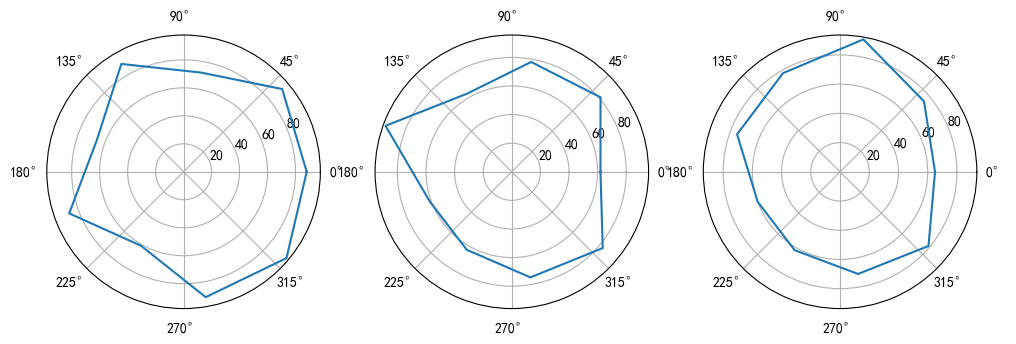

In [88]:
"""
使用 pathlib 绘制雷达图
------------------------------------------------------------
这里读取上一段生成的 Excel 文件, 并绘制雷达图
"""

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from math import pi

dir = Path('.').parent                      # 获取当前位置
df = pd.read_excel(dir / 'data.xlsx')       # 读取 Data.xlsx 文件
data = df.iloc[:, 1:].values                # 读取数据
plt.figure(figsize=(12, 4), dpi=100)        # 设置画布大小和分辨率
theta = [j * 2 * pi / 9 for j in range(10)] # 设置角度集 (0, 40, 80, ..., 360)
for i in range(3):
    plt.subplot(1, 3, i + 1, polar=True)    # 设置子图
    rhos = list(data[i]) + [data[i][0]]     # 设置雷达图的半径集
    plt.polar(theta, rhos)                  # 绘制雷达图
plt.show()                                  # 显示图像


### 四、优化雷达图的视觉效果

在上一部分中，我们得到了完整的雷达图，但是其视觉效果不够美观。我们希望能够：

- 为各个子图添加标题
- 为科目添加标签
- 增加数据上限以体现留白
- 为各个子图赋予不同的颜色
- 添加每个点的数值标签
- 修改背景线为虚线
- 填充雷达图的闭合区域

我们在上一部分代码的基础上进行修改，代码如下：


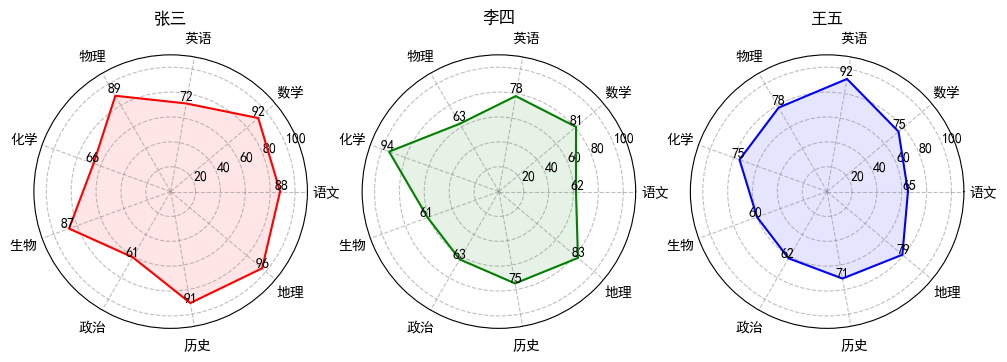

In [89]:
"""
优化雷达图的视觉效果
------------------------------------------------------------
这里对上一段的雷达图进行优化, 使其更加美观
"""

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from math import pi

dir = Path('.').parent
df = pd.read_excel(dir / 'data.xlsx')
plt.figure(figsize=(12, 4), dpi=100)
data = df.iloc[:, 1:].values
theta = [j * 2 * pi / 9 for j in range(10)]
names = df.iloc[:, 0].values                    # 读取第一列作为子图标题
labels = df.columns[1:].values                  # 读取第一行作为雷达图的标签
plt.rcParams['font.sans-serif'] = ['SimHei']    # 解决中文显示问题
colors = ['r', 'g', 'b']                        # 设置子图的颜色集
for i in range(3):
    plt.subplot(1, 3, i + 1, polar=True)
    rhos = list(data[i]) + [data[i][0]]
    plt.polar(theta, rhos, color=colors[i])
    plt.title(names[i])                                 # 设置子图标题
    plt.xticks(theta[:-1], labels)                      # 替代极坐标的角度标签
    plt.ylim(0, 110)                                    # 设置极坐标的半径范围
    for j in range(9):                                  # 为每个点添加数据
        plt.text(theta[j], rhos[j] + 1, rhos[j],
                 ha='center', va='bottom', fontsize=10)
    plt.grid(c='gray', linestyle='--', alpha=0.5)       # 设置网格线
    plt.fill(theta, rhos, alpha=0.1, color=colors[i])   # 填充雷达图
plt.show()


### 五、将雷达图的绘制封装为泛用性函数，方便后续使用

我们计划将单个雷达图的绘制封装为函数。函数支持传入：

- 标签集
- 数据集
- 数据上限 [可选]
- 标题 [可选]
- 颜色 [可选]

函数能够：

- 自动排除错误输入
- 自动识别数据长度并合理处理
- 自动闭合数据集
- 若没有指定，自动设置数据上限

然后使用之前的数据，调用函数绘制多图。代码如下：


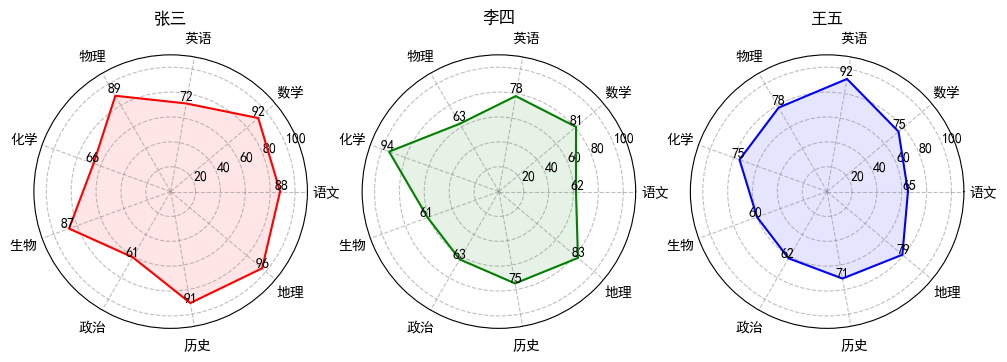

In [3]:
"""
将雷达图的绘制封装为泛用性函数
------------------------------------------------------------
这里将上一段的雷达图绘制封装为泛用性函数, 以便后续的调用
"""

import pandas as pd
import matplotlib.pyplot as plt
from math import pi


def plt_radar(labels: list, data: list, limit: int = 0, title: str = '', color: str = '#1f77b4') -> None:
    """单个雷达图的绘制"""
    lenLabels = len(labels)
    lenData = len(data)
    if lenLabels != lenData:
        raise ValueError(
            'labels 和 data 的长度不一致! | '
            'Length of labels and data are not equal!')
    theta = [j * 2 * pi / lenLabels for j in range(lenLabels + 1)]
    rhos = list(data) + [data[0]]
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.polar(theta, rhos, color=color)
    if title:
        plt.title(title)
    plt.xticks(theta[:-1], labels)
    if limit:
        plt.ylim(0, limit)
    else:
        plt.ylim(0, int(max(rhos) * 1.1))
    for j in range(lenLabels):
        plt.text(theta[j], rhos[j] + 1, rhos[j],
                 ha='center', va='bottom', fontsize=10)
    plt.grid(c='gray', linestyle='--', alpha=0.5)        # 设置网格线
    plt.fill(theta, rhos, alpha=0.1, color=colors[i])   # 填充雷达图


if __name__ == '__main__':
    from pathlib import Path
    dir = Path('.').parent
    df = pd.read_excel(dir / 'data.xlsx')
    plt.figure(figsize=(12, 4), dpi=100)
    data = df.iloc[:, 1:].values
    names = df.iloc[:, 0].values
    labels = df.columns[1:].values
    colors = ['r', 'g', 'b']
    for i in range(3):
        plt.subplot(1, 3, i + 1, polar=True)
        plt_radar(labels, data[i], 110, names[i], colors[i])
    plt.show()


## 实验总结

在实验中，我们对本学期的多个核心知识点进行了复习和巩固，完成了既定的实验计划。
